<a href="https://colab.research.google.com/github/paulynamagana/for_fun/blob/main/Publications_over_time.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Retrieving and Graphing Publications Over Time

Using Entrez Programming Utilities (E-utilities) to Search for

Install all the packages

---





Next code will pop-up a dialog for you to enter the search terms

---



In [13]:
!python -m pip install biopython
from Bio import Entrez
from Bio import Medline
from tqdm import tqdm
import ipywidgets as wgt

search_term_input1 = wgt.Textarea(
    value='term to search',
    placeholder='Search term',
    description='Enter a search term:',
    style={'description_width': 'initial'},
    disabled=False
)

display(search_term_input1)

Textarea(value='gene', description='Enter a search term:', placeholder='Search term', style=DescriptionStyle(d…

This part will search publications with that terms and get the number of publications found and the location of search results:

In [14]:
Entrez.email = "Paulyna.MaganaGomez@nottingham.ac.uk"
keyword = ( search_term_input1.value ) #change keywork to the one we want

result = Entrez.read(Entrez.esearch(db="pubmed", retmax=10, term=keyword))
print(
    "Total number of publications that contain the term {}: {}".format(keyword, result["Count"]
    )
)

Total number of publications that contain the term AlphaFold: 803


In [15]:
# Fetch all ids
MAX_COUNT = result["Count"]
result = Entrez.read(
    Entrez.esearch(db="pubmed", retmax=result["Count"], term=keyword)
)

ids = result["IdList"]

batch_size = 100
batches = [ids[x: x + 100] for x in range(0, len(ids), batch_size)]

record_list = []
for batch in tqdm(batches):
    h = Entrez.efetch(db="pubmed", id=batch, rettype="medline", retmode="text")
    records = Medline.parse(h)
    record_list.extend(list(records))
print("Complete.")

100%|██████████| 9/9 [00:07<00:00,  1.13it/s]

Complete.


In [24]:
record_list[:10]

[{'PMID': '37828397',
  'OWN': 'NLM',
  'STAT': 'Publisher',
  'LR': '20231012',
  'IS': '1559-0100 (Electronic) 1355-008X (Linking)',
  'DP': '2023 Oct 12',
  'TI': "The mystery of transient pregnancy-induced cushing's syndrome: a case report and literature review highlighting GNAS somatic mutations and LHCGR overexpression.",
  'LID': '10.1007/s12020-023-03549-7 [doi]',
  'AB': "PURPOSE: Transient pregnancy-induced Cushing's syndrome is a rare condition characterized by the manifestation of symptoms solely during pregnancy, which typically resolve spontaneously following delivery or miscarriage. While it has been established that GNAS is associated with adrenal tumors, its specific role in the pathogenesis of pregnancy-induced Cushing's syndrome remains uncertain.This work aims to examine the association between GNAS mutation and pregnancy-induced Cushing's syndrome. METHODS: DNA was extracted from patients' peripheral blood and tumor tissues for whole-exome sequencing (WES) and Sang

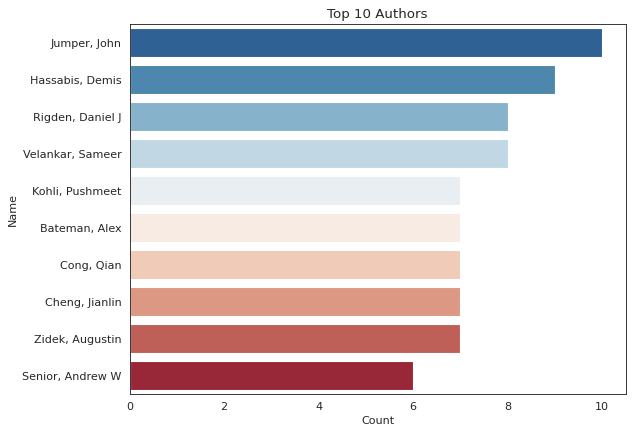

In [16]:
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set_style("white")

publication_data = pd.DataFrame(record_list)
publication_data.dropna(subset=['EDAT'], inplace=True)
publication_data["Year"] = (
    publication_data["EDAT"].astype(str).str[0:4].astype(int)
)

plt.figure(figsize=(8, 6), dpi=80)

# Top 10 authors
authors_flat = [
    author
    for authors in list(publication_data["FAU"].dropna())
    for author in authors
]
top10authors = pd.DataFrame.from_records(
    Counter(authors_flat).most_common(10), columns=["Name", "Count"]
)
sns.barplot(x="Count", y="Name", data=top10authors, palette="RdBu_r")
plt.title("Top 10 Authors")
plt.show()


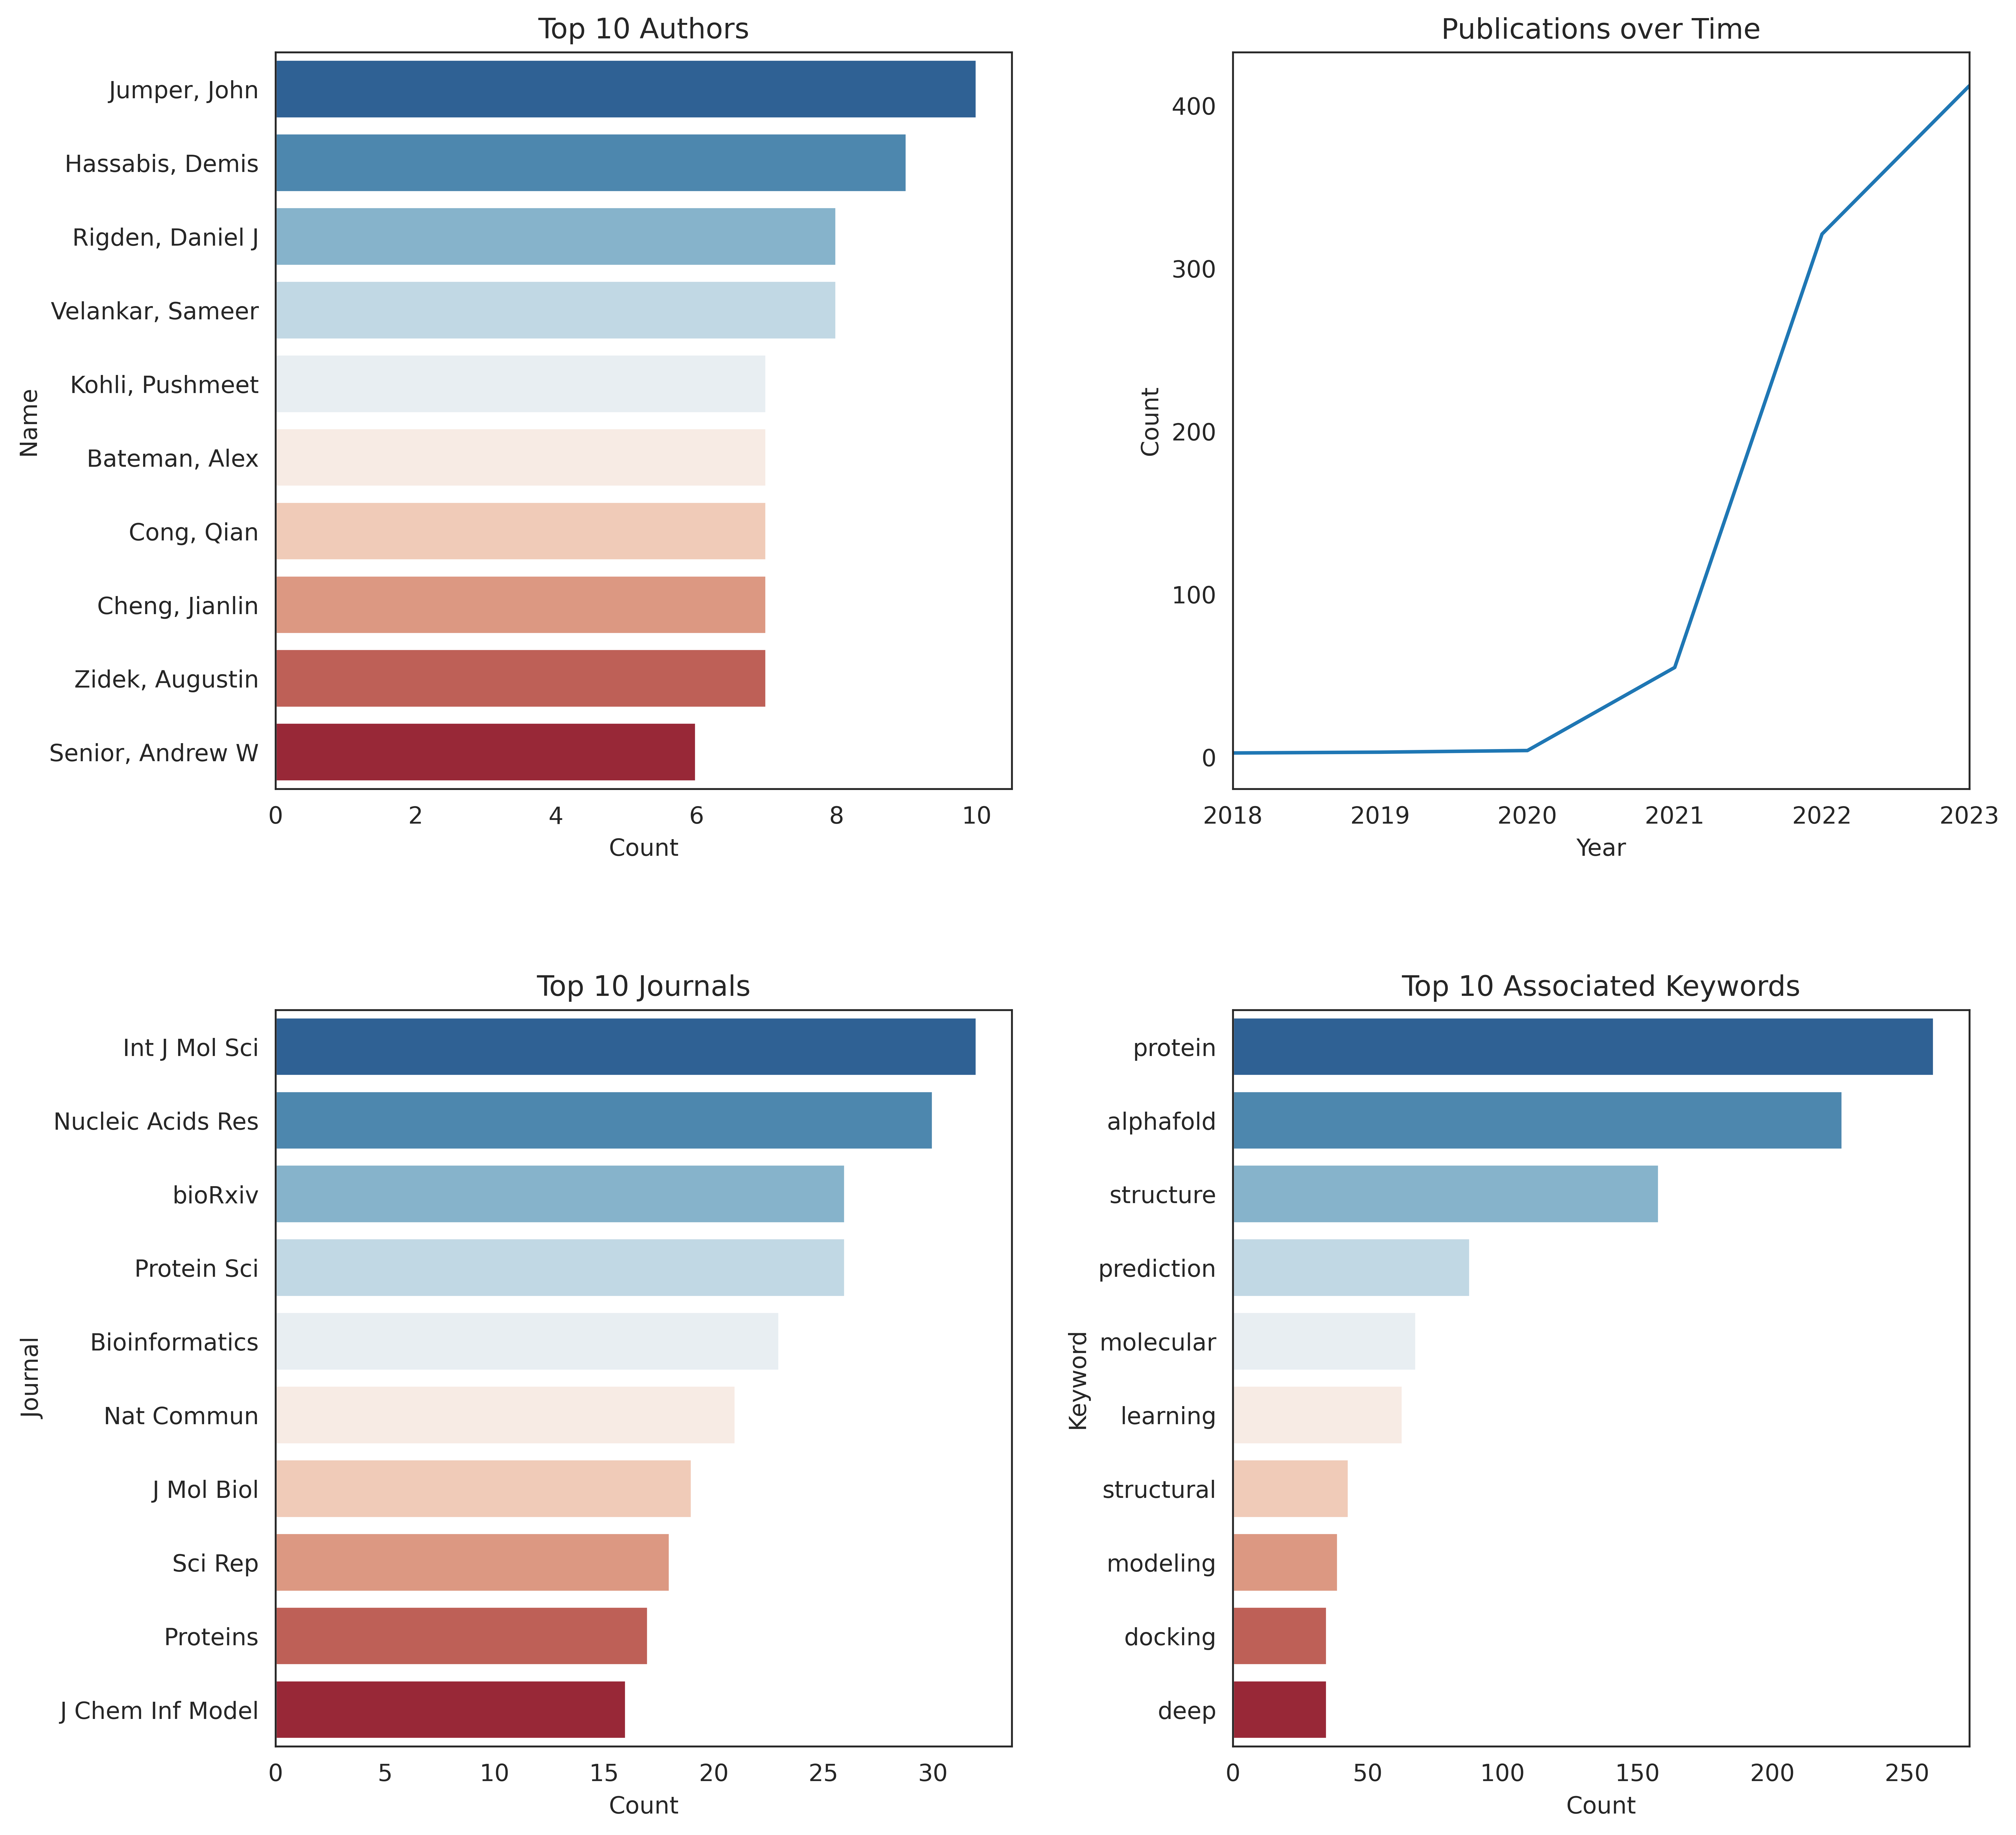

In [17]:
sns.set_style("white")

publication_data = pd.DataFrame(record_list)
publication_data.dropna(subset=['EDAT'], inplace=True)
publication_data["Year"] = (
    publication_data["EDAT"].astype(str).str[0:4].astype(int)
)

plt.figure(figsize=(10, 10), dpi=600)

# Top 10 authors
plt.subplot(2, 2, 1)
authors_flat = [
    author
    for authors in list(publication_data["FAU"].dropna())
    for author in authors
]
top10authors = pd.DataFrame.from_records(
    Counter(authors_flat).most_common(10), columns=["Name", "Count"]
)
sns.barplot(x="Count", y="Name", data=top10authors, palette="RdBu_r")
plt.title("Top 10 Authors")


# Publications over Time
plt.subplot(2, 2, 2)
yearly = pd.DataFrame(publication_data["Year"].value_counts().reset_index())
yearly.columns = ["Year", "Count"]
sns.lineplot(x="Year", y="Count", data=yearly)
plt.title("Publications over Time")
plt.xlim([2018, 2023])


plt.subplot(2, 2, 3)

# TOP 10 Journals
top10journals = pd.DataFrame.from_records(
    Counter(publication_data["TA"]).most_common(10),
    columns=["Journal", "Count"],
)

sns.barplot(x="Count", y="Journal", data=top10journals, palette="RdBu_r")
plt.title("Top 10 Journals")

# Top associated keywords
plt.subplot(2, 2, 4)

flat_kw = [
    _.lower()
    for kws in list(publication_data["OT"].dropna())
    for kw in kws
    for _ in kw.split(" ")
]

top10kw = pd.DataFrame.from_records(
    Counter(flat_kw).most_common(10), columns=["Keyword", "Count"]
)

sns.barplot(x="Count", y="Keyword", data=top10kw, palette="RdBu_r")
plt.title("Top 10 Associated Keywords")
plt.subplots_adjust(top=1, bottom=0, left=0, right=1, hspace=0.3, wspace=0.3)
plt.show()

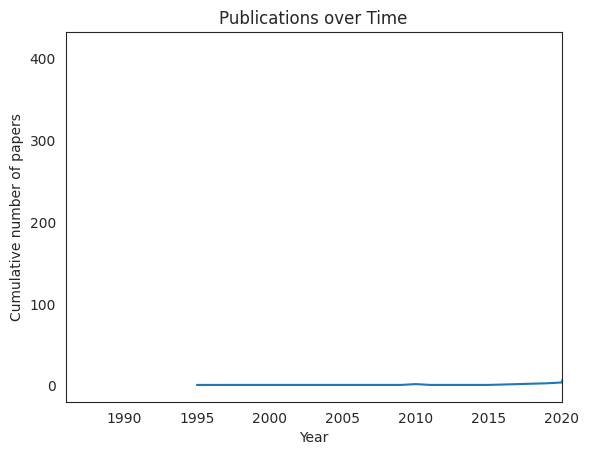

In [18]:
# Publications over Time
yearly = pd.DataFrame(publication_data["Year"].value_counts().reset_index())
yearly.columns = ["Year", "Count"]
sns.lineplot(x="Year", y="Count", data=yearly)
plt.xlabel("Year")
plt.ylabel("Cumulative number of papers")
plt.title("Publications over Time")
plt.xlim([1986, 2020])
plt.show()